In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Input, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2024-01-02 16:39:58.545809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


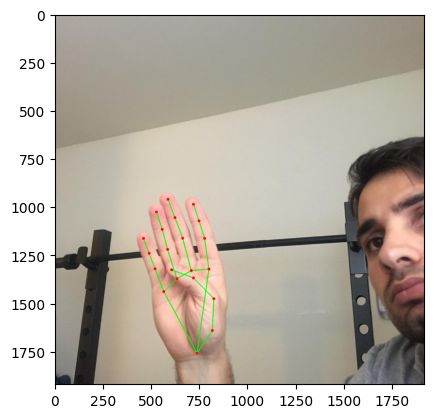

In [2]:
# Define a few mediapipe tools
mp_hands = mp.solutions.hands
mp_drawing_styles = mp.solutions.drawing_styles
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.3)

# Show an image from dataset with landmarks
img = cv2.imread('Data/B/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = hands.process(img)
if res.multi_hand_landmarks:
    mp_drawing.draw_landmarks(img, res.multi_hand_landmarks[0], mp_hands.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(255,0,0), thickness=5, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(0,255,0), thickness=3, circle_radius=2))
    
plt.imshow(img)
plt.show()

In [3]:
DATA_PATH = 'Data'
LANDMARK_DATA_PATH = 'Landmarks'
letters = []

# Create landmark data directory
for d in os.listdir(DATA_PATH):
    try: 
        os.makedirs(os.path.join(LANDMARK_DATA_PATH, d))
        letters.append(d)
    except:
        pass

# Add landmarks to directory
for d in os.listdir(DATA_PATH):
    print(d)
    for img_path in os.listdir(os.path.join(DATA_PATH, d)):
        landmarks = []
        img = cv2.imread(os.path.join(DATA_PATH, d, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        res = hands.process(img)

        hand_landmarks = np.array([[landmark.x, landmark.y] for landmark in res.multi_hand_landmarks[0].landmark]).flatten() if res.multi_hand_landmarks else np.zeros(21 * 2)
        npy_path = os.path.join(LANDMARK_DATA_PATH, d, img_path.split('.')[0])
        np.save(npy_path, hand_landmarks)      

R
U
I
N
G
T
S
A
F
O
H
M
C
D
V
Q
X
E
B
K
L
Y
P
W
